In [1]:
print("Observation 1: Check out that beautifully grouped scatter! We can definitively say that it is warmer by the equator. Boom.")
print("Observation 2: A quick glance at processing list shows some real popular cities! Rikitea shows up 65 times, Busselton 32 times, Bluff 30 times. What gives? Well, these cities are SUPER isolated, so our methodology favors them. To combat this, I added the ~200m radius rule, should make our data a little more reliable.")
print("Observation 3: I was initially startled by the way the 'cloudiness' points are grouped, but then realized it must just increment by 5's, leading to clear bands of data.")
      
#Ok, there's two basic parts of this question. 1- Select 500 cities, 2- cycle through and grab temperature (and step 3, plot)
# It's part 1 that I'm worried about. Are we... selecting random Lat/Longs then finding a nearby city?
# that seems bad- we'll just be favoring coastal cities. I've got a different plan, outlined below, that should be more fair.

#Note long is -180 to 180, lat is -90 to 90

Observation 1: Check out that beautifully grouped scatter! We can definitively say that it is warmer by the equator. Boom.
Observation 2: A quick glance at processing list shows some real popular cities! Rikitea shows up 65 times, Busselton 32 times, Bluff 30 times. What gives? Well, these cities are SUPER isolated, so our methodology favors them. To combat this, I added the ~200m radius rule, should make our data a little more reliable.
Observation 3: I was initially startled by the way the 'cloudiness' points are grouped, but then realized it must just increment by 5's, leading to clear bands of data.


In [2]:
#import our libraries- I'm think random, citypy, and whatever lets us grab the weather api. +config, obvi.
import openweathermapy.core as owm
import pandas as pd
import random
import matplotlib as plt
import urllib
from citipy import citipy
#from config import api_weather - ok, so, normally this would be great. But, for github, let's allow user to input
api_weather = input("Please enter your Open Weather Map API Key: ")

#establish the weather settings, let's use Farenheit
settings = {"units": "imperial", "appid": api_weather}

Please enter your Open Weather Map API Key: 11cbc60ffa918667a87fbe4db77d4ecb


In [3]:
#In order to avoid enormous Pacific sinkholes of data, I'd like to limit our findings further to cities within 200 miles of coords.
#Let's do this:
    #counter =0
    #latitude_list=[]
    #temp_list=[]
    #whole counter = <500
        #Randomly generate coords
        #Find a nearby city with citypy
        #If city is within 200 miles:   <-----------
            #Try to send city to temp API
                #Exceptions for if the city can't be found
            #record lattitude
            #record temp
            #counter=counter+1
            

In [4]:
counter = 0
attempts = 0
city_list = []
temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
lat_list = []
lon_list = []

while counter < 500:
    attempts = attempts + 1
    lat = random.uniform(-90,90)
    lon = random.uniform(-180,180)
    city = citipy.nearest_city(lat,lon)
    if city.city_name in city_list:
        print("{}: {} is already in our list!".format(attempts, city.city_name))
    else:
        try:
            new_weather = owm.get_current(city.city_name + "," + city.country_code, **settings)
        except urllib.error.HTTPError:
            print("{}: {} not found in OWM.".format(attempts, city.city_name)) 
            continue
        if (abs(new_weather['coord']['lon'] - lon) <10 and  #lines of longitude vary a lot. at +/-60, a degree is about ~34 miles. 34*6= 204 miles
        abs(new_weather['coord']['lat'] - lat) <4): #lines of lattitude are pretty constant- 3 degrees will be ~68*3 - 204 miles apart
            city_list.append(city.city_name)
            temp_list.append(new_weather['main']['temp'])
            humidity_list.append(new_weather['main']['humidity'])
            cloudiness_list.append(new_weather['clouds']['all'])
            windspeed_list.append(new_weather['wind']['speed'])
            lat_list.append(new_weather['coord']['lat'])
            lon_list.append(new_weather['coord']['lon'])
            counter = counter+1
            print("{}: Adding {} to our list.".format(attempts, city.city_name))
        else:
            print("{}: {} is too far from the generated coordinates.".format(attempts, city.city_name))
weather_dict = {"City":city_list, "Temperature":temp_list, "Latitude": lat_list, "Longitude":lon_list, "Humidity":humidity_list, "Cloudiness":cloudiness_list, "Wind Speed":windspeed_list}
weather_df = pd.DataFrame(weather_dict)
weather_df
print("It took {} calls to retrieve this data.".format(attempts))
        

1: Adding atuona to our list.
2: yellowknife is too far from the generated coordinates.
3: Adding isangel to our list.
4: hilo is too far from the generated coordinates.
5: mataura not found in OWM.
6: Adding santa marta to our list.
7: Adding port blair to our list.
8: punta arenas is too far from the generated coordinates.
9: atuona is already in our list!
10: ushuaia is too far from the generated coordinates.
11: Adding ucluelet to our list.
12: Adding faanui to our list.
13: castro is too far from the generated coordinates.
14: bluff is too far from the generated coordinates.
15: Adding pacific grove to our list.
16: Adding marystown to our list.
17: laguna not found in OWM.
18: oktyabrskoye is too far from the generated coordinates.
19: busselton is too far from the generated coordinates.
20: Adding zhigansk to our list.
21: port alfred is too far from the generated coordinates.
22: Adding victoria to our list.
23: Adding busselton to our list.
24: punta arenas is too far from the

182: Adding ayorou to our list.
183: Adding eureka to our list.
184: busselton is already in our list!
185: barentsburg not found in OWM.
186: Adding cairns to our list.
187: Adding novyy urgal to our list.
188: punta arenas is too far from the generated coordinates.
189: Adding bandarbeyla to our list.
190: mar del plata is too far from the generated coordinates.
191: khatanga is too far from the generated coordinates.
192: Adding san juan de la maguana to our list.
193: Adding port hedland to our list.
194: chokurdakh is too far from the generated coordinates.
195: ushuaia is too far from the generated coordinates.
196: tuktoyaktuk is too far from the generated coordinates.
197: rikitea is already in our list!
198: Adding umred to our list.
199: mahebourg is too far from the generated coordinates.
200: hermanus is too far from the generated coordinates.
201: rikitea is already in our list!
202: vila velha is too far from the generated coordinates.
203: punta arenas is too far from th

366: katsuura is too far from the generated coordinates.
367: hermanus is too far from the generated coordinates.
368: leningradskiy is too far from the generated coordinates.
369: east london is too far from the generated coordinates.
370: norman wells is too far from the generated coordinates.
371: vaini is too far from the generated coordinates.
372: georgetown is already in our list!
373: Adding lebu to our list.
374: Adding kapaa to our list.
375: pacific grove is already in our list!
376: Adding yulara to our list.
377: honiara is too far from the generated coordinates.
378: marcona not found in OWM.
379: san vicente is too far from the generated coordinates.
380: bac lieu not found in OWM.
381: muros is already in our list!
382: mahebourg is too far from the generated coordinates.
383: Adding coquimbo to our list.
384: Adding palauig to our list.
385: carnarvon is too far from the generated coordinates.
386: santa isabel not found in OWM.
387: albany is too far from the generate

556: Adding kloulklubed to our list.
557: stoyba not found in OWM.
558: port lincoln is too far from the generated coordinates.
559: Adding ormara to our list.
560: castro is too far from the generated coordinates.
561: vaini is too far from the generated coordinates.
562: Adding chiredzi to our list.
563: ushuaia is too far from the generated coordinates.
564: Adding nagato to our list.
565: jamestown is already in our list!
566: Adding broome to our list.
567: nizhneyansk not found in OWM.
568: Adding shubarkuduk to our list.
569: Adding constitucion to our list.
570: saskylakh is already in our list!
571: geraldton is too far from the generated coordinates.
572: mys shmidta not found in OWM.
573: Adding talegaon dabhade to our list.
574: sorland is too far from the generated coordinates.
575: busselton is already in our list!
576: lasa not found in OWM.
577: clyde river is already in our list!
578: illoqqortoormiut not found in OWM.
579: Adding morlaix to our list.
580: tsihombe not

740: Adding chengannur to our list.
741: mataura not found in OWM.
742: rikitea is already in our list!
743: saint-philippe is too far from the generated coordinates.
744: Adding torbay to our list.
745: padang is too far from the generated coordinates.
746: thompson is too far from the generated coordinates.
747: Adding cayenne to our list.
748: dikson is too far from the generated coordinates.
749: Adding northam to our list.
750: arraial do cabo is too far from the generated coordinates.
751: ribeira grande is already in our list!
752: olafsvik not found in OWM.
753: iqaluit is already in our list!
754: illoqqortoormiut not found in OWM.
755: Adding troitsko-pechorsk to our list.
756: atuona is already in our list!
757: Adding perevolotskiy to our list.
758: hobart is too far from the generated coordinates.
759: hobart is too far from the generated coordinates.
760: cherskiy is already in our list!
761: georgetown is already in our list!
762: punta arenas is already in our list!
763

942: Adding te anau to our list.
943: vaini is already in our list!
944: fallon is too far from the generated coordinates.
945: te anau is already in our list!
946: hobart is too far from the generated coordinates.
947: Adding the valley to our list.
948: cidreira is too far from the generated coordinates.
949: longyearbyen is too far from the generated coordinates.
950: albany is too far from the generated coordinates.
951: Adding wuwei to our list.
952: saleaula not found in OWM.
953: kaitangata is too far from the generated coordinates.
954: amderma not found in OWM.
955: illoqqortoormiut not found in OWM.
956: hobart is too far from the generated coordinates.
957: busselton is already in our list!
958: vaini is already in our list!
959: port alfred is too far from the generated coordinates.
960: coquimbo is already in our list!
961: cape town is too far from the generated coordinates.
962: zhigansk is already in our list!
963: chokurdakh is already in our list!
964: cape town is to

1141: vostok is too far from the generated coordinates.
1142: ushuaia is too far from the generated coordinates.
1143: salalah is already in our list!
1144: Adding nizhnetroitskiy to our list.
1145: chuy is too far from the generated coordinates.
1146: barentsburg not found in OWM.
1147: vaini is already in our list!
1148: punta arenas is already in our list!
1149: amapa is too far from the generated coordinates.
1150: Adding mastic beach to our list.
1151: Adding belaya gora to our list.
1152: torbay is already in our list!
1153: Adding celina to our list.
1154: khasan is already in our list!
1155: albany is too far from the generated coordinates.
1156: vaini is already in our list!
1157: rikitea is already in our list!
1158: atuona is already in our list!
1159: antofagasta is already in our list!
1160: port elizabeth is too far from the generated coordinates.
1161: avarua is already in our list!
1162: rikitea is already in our list!
1163: khatanga is already in our list!
1164: pevek 

1337: Adding ligayan to our list.
1338: Adding tangwani to our list.
1339: mataura not found in OWM.
1340: Adding emilio carranza to our list.
1341: Adding maningrida to our list.
1342: ribeira grande is already in our list!
1343: katsuura is too far from the generated coordinates.
1344: Adding gamba to our list.
1345: saint-augustin is too far from the generated coordinates.
1346: port lincoln is too far from the generated coordinates.
1347: saint-philippe is too far from the generated coordinates.
1348: Adding emet to our list.
1349: tuktoyaktuk is too far from the generated coordinates.
1350: jamestown is already in our list!
1351: busselton is already in our list!
1352: port alfred is too far from the generated coordinates.
1353: berlevag is already in our list!
1354: cayenne is already in our list!
1355: Adding barcelos to our list.
1356: Adding huai yot to our list.
1357: busselton is already in our list!
1358: cape town is too far from the generated coordinates.
1359: hilo is al

1536: Adding riberalta to our list.
1537: albany is too far from the generated coordinates.
1538: whitehorse is already in our list!
1539: sitka is too far from the generated coordinates.
1540: punta arenas is already in our list!
1541: rikitea is already in our list!
1542: bluff is too far from the generated coordinates.
1543: albany is too far from the generated coordinates.
1544: vaini is already in our list!
1545: hithadhoo is too far from the generated coordinates.
1546: busselton is already in our list!
1547: Adding tazovskiy to our list.
1548: shenjiamen is already in our list!
1549: pisco is already in our list!
1550: Adding alyangula to our list.
1551: Adding arman to our list.
1552: Adding demba to our list.
1553: hobart is too far from the generated coordinates.
1554: busselton is already in our list!
1555: sitka is too far from the generated coordinates.
1556: kattivakkam is already in our list!
1557: ushuaia is already in our list!
1558: busselton is already in our list!
1

1733: sao joao da barra is too far from the generated coordinates.
1734: rikitea is already in our list!
1735: Adding khandbari to our list.
1736: Adding dunedin to our list.
1737: rikitea is already in our list!
1738: avarua is already in our list!
1739: hermanus is already in our list!
1740: Adding guymon to our list.
1741: port alfred is too far from the generated coordinates.
1742: vaini is already in our list!
1743: jamestown is already in our list!
1744: Adding finspang to our list.
1745: rikitea is already in our list!
1746: ancud is too far from the generated coordinates.
1747: vostok is too far from the generated coordinates.
1748: cherskiy is already in our list!
1749: ushuaia is already in our list!
1750: Adding lahij to our list.
1751: kapoeta not found in OWM.
1752: ushuaia is already in our list!
1753: lagoa is too far from the generated coordinates.
1754: castro is already in our list!
1755: Adding rantepao to our list.
1756: Adding kjollefjord to our list.
1757: belushy

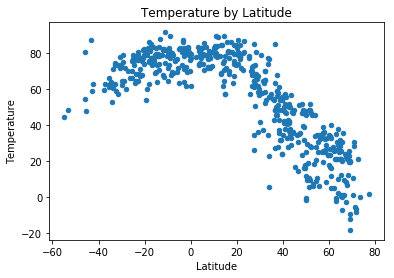

In [9]:
weather_df.plot.scatter("Latitude", "Temperature").set_title("Temperature by Latitude")
plt.pyplot.savefig('temp_plot.png')

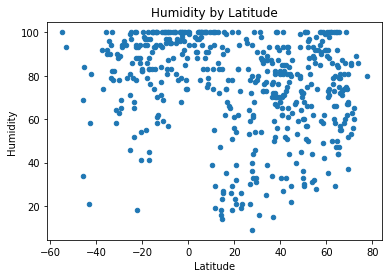

In [7]:
weather_df.plot.scatter("Latitude", "Humidity").set_title("Humidity by Latitude")
plt.pyplot.savefig('humi_plot.png')

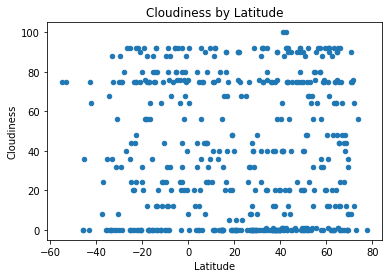

In [10]:
weather_df.plot.scatter("Latitude", "Cloudiness").set_title("Cloudiness by Latitude")
plt.pyplot.savefig('cloud_plot.png')

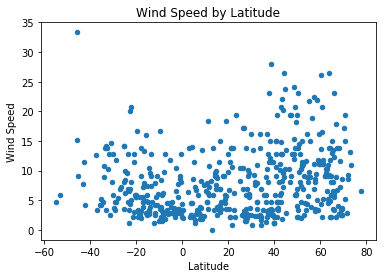

In [11]:
weather_df.plot.scatter("Latitude", "Wind Speed").set_title("Wind Speed by Latitude")
plt.pyplot.savefig('wind_plot.png')

In [12]:
weather_df.to_csv("city_list.csv")

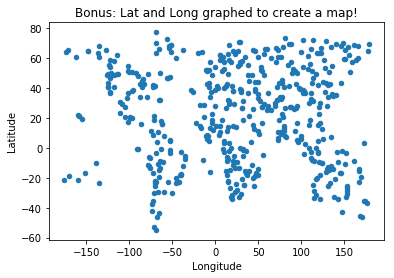

In [13]:
weather_df.plot.scatter("Longitude", "Latitude").set_title("Bonus: Lat and Long graphed to create a map!")
plt.pyplot.savefig('map_plot.png')